In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/PlantDoc-Object-Detection-Dataset-master 2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/PlantDoc-Object-Detection-Dataset-master 2/TRAIN/tr/Tomato___Bacterial_spot/12071472-8b0f-494e-994e-8abff2082ec4___GCREC_Bact.Sp 6130.JPG
/content/drive/My Drive/PlantDoc-Object-Detection-Dataset-master 2/TRAIN/tr/Tomato___Bacterial_spot/144352ee-0f8d-44cc-9db1-c4f27eb5a00a___GCREC_Bact.Sp 3284.JPG
/content/drive/My Drive/PlantDoc-Object-Detection-Dataset-master 2/TRAIN/tr/Tomato___Bacterial_spot/39397863-767f-4187-b580-f4fb2279dfe6___GCREC_Bact.Sp 3687.JPG
/content/drive/My Drive/PlantDoc-Object-Detection-Dataset-master 2/TRAIN/tr/Tomato___Bacterial_spot/256051f1-8e69-4f2b-b4d5-400fccb18623___GCREC_Bact.Sp 3313.JPG
/content/drive/My Drive/PlantDoc-Object-Detection-Dataset-master 2/TRAIN/tr/Tomato___Bacterial_spot/3813824a-787e-437a-bdd2-2bd99f57edb6___GCREC_Bact.Sp 3416.JPG
/content/drive/My Drive/PlantDoc-Object-Detection-Dataset-master 2/TRAIN/tr/Tomato___Bacterial_spot/371929a8-17b8-4077-94f4-cfb6963d9285___

In [ ]:
base_dir='/content/drive/My Drive/PlantDoc-Object-Detection-Dataset-master 2'

train_dir='/content/drive/My Drive/PlantDoc-Object-Detection-Dataset-master 2/TRAIN/tr'
print("train data:", len(os.listdir(train_dir)))

val_dir='/content/drive/My Drive/PlantDoc-Object-Detection-Dataset-master 2/TEST/val'
print("val data:", len(os.listdir(val_dir)))

train data: 10
val data: 10


In [ ]:
import pathlib
train_data_directory = pathlib.Path('/content/drive/My Drive/PlantDoc-Object-Detection-Dataset-master 2/TRAIN/tr')
class_names = sorted([item.name for item in train_data_directory.glob('*')])
print(class_names)

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [ ]:
val_data_directory = pathlib.Path('/content/drive/My Drive/PlantDoc-Object-Detection-Dataset-master 2/TEST/val')
class_names = sorted([item.name for item in train_data_directory.glob('*')])
print(class_names)

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen=ImageDataGenerator(rescale = 1/255.)
test_data_gen=ImageDataGenerator(rescale=1/255.)

train_data = train_data_gen.flow_from_directory(train_dir,
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          class_mode = 'categorical')
val_data = test_data_gen.flow_from_directory(val_dir,
                                        target_size = (224, 224),
                                        batch_size = 32,
                                        class_mode = 'categorical')

Found 10010 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [ ]:
images, labels = next(train_data)
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

In [ ]:
train_data, val_data

(<keras.src.preprocessing.image.DirectoryIterator at 0x7e6e3a822680>,
 <keras.src.preprocessing.image.DirectoryIterator at 0x7e6e3a823580>)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense

In [ ]:
model = Sequential()

model.add(Conv2D(128, (3, 3),input_shape=(224,224,3)))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1029))
model.add(Activation("relu"))

model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 activation_7 (Activation)   (None, 222, 222, 128)     0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 128)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 74, 74, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 128)       147584    
                                                                 
 activation_8 (Activation)   (None, 72, 72, 128)       0         
                                                      

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_data,validation_data=val_data,batch_size=32,verbose=1,epochs=15)

Epoch 1/15
313/313 [==============================] - 362s 1s/step - loss: 1.6699 - accuracy: 0.3876 - val_loss: 1.0508 - val_accuracy: 0.6310
Epoch 2/15
313/313 [==============================] - 354s 1s/step - loss: 0.9613 - accuracy: 0.6547 - val_loss: 0.9243 - val_accuracy: 0.6720
Epoch 3/15
313/313 [==============================] - 353s 1s/step - loss: 0.7144 - accuracy: 0.7508 - val_loss: 0.6875 - val_accuracy: 0.7580
Epoch 4/15
313/313 [==============================] - 352s 1s/step - loss: 0.5604 - accuracy: 0.7988 - val_loss: 0.5411 - val_accuracy: 0.8180
Epoch 5/15
313/313 [==============================] - 352s 1s/step - loss: 0.4376 - accuracy: 0.8470 - val_loss: 0.4721 - val_accuracy: 0.8470
Epoch 6/15
313/313 [==============================] - 351s 1s/step - loss: 0.3916 - accuracy: 0.8637 - val_loss: 0.5513 - val_accuracy: 0.8190
Epoch 7/15
313/313 [==============================] - 351s 1s/step - loss: 0.3193 - accuracy: 0.8921 - val_loss: 0.4540 - val_accuracy: 0.8580

In [ ]:
model.evaluate(train_data, verbose=1)

313/313 [==============================] - 76s 243ms/step - loss: 0.0428 - accuracy: 0.9868


[0.04284160956740379, 0.9868131875991821]

In [ ]:
model.save_weights("model_weights.hdf5")
model.save("tomato.hdf5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


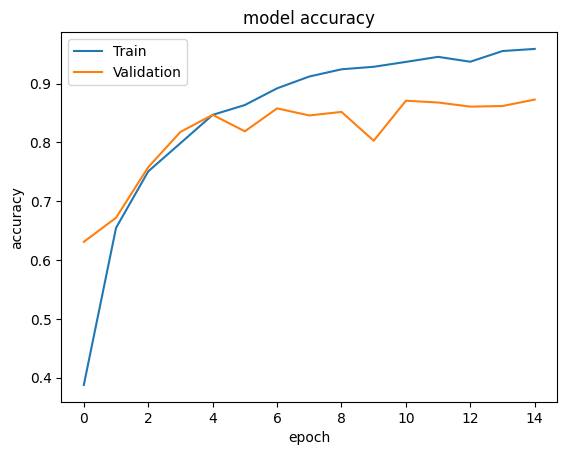

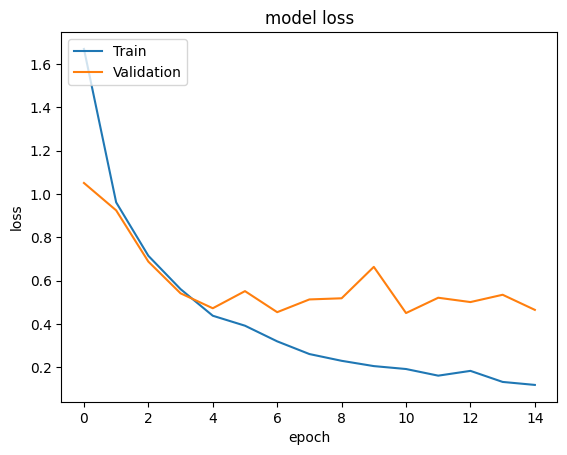

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
'''def preprocess_images(path):
    img = image.load_img(path, target_size=(224, 224))

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_preprocessed = img_array / 255.0

    return img_preprocessed'''